На основе рассмотренного на занятии Colab-ноутбука по распознаванию предметов одежды решите задачу распознавания рукописных цифр. 

На этот раз примените не полносвязную, а сверточную нейронную сеть. 

Сравните полученные результаты работы сверточной нейронной сети с аналогичными результатами работы полносвязной нейронной сети.

Поэкспериментируйте с различными конфигурациями сети. 

Приведите графики долей правильных ответов на обучающем множестве и валидационном. 

Определите оптимальное количество эпох для обучения для каждой из используемых конфигураций нейронной сети. 

Получите оценки качества классификаторов на тестовом множестве. 

Какая конфигурация из используемых лучше? 

Определите для каждой цифры на тестовом множестве точность работы классификаторов. 

Проведите тестирование построенной модели на реальных данных с изображениями рукописных цифр.

### исправил точность нейросети, но комментарии не исправлял, поэтому там везде написано, что всё работает плохо, но по факту хорошо ###

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
classes = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9']

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),#первый слой
    #сделали изображение ЧБ
    #relu - функция активации
    #у слоя 32 фильтра, у такого же следующего 64
    #размеры фильров 3 на 3
    MaxPooling2D((2,2)),#слой обьеденения макс значения
    Conv2D(64, (3,3), activation='relu'),#ещё свёрточный слой
    MaxPooling2D((2,2)),#ещё обьеденение
    Flatten(),#преобразование в вектор
    Dense(64, activation='relu'),#слой с 64 нейронами
    Dense(10, activation='softmax')#выходной слой с 10 нейронами
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1424 - accuracy: 0.9555 - val_loss: 0.0684 - val_accuracy: 0.9792
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0343 - val_accuracy: 0.9885
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.0320 - val_accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0302 - val_accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0325 - val_accuracy: 0.9898


по результатм обучения видно, что хватает и 2 эпох

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('точность:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9898
точность: 0.989799976348877


In [10]:
def preobr(img):
    x = utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255
    x = 1 - x
    return x

1/1 [==============================] - 0s 97ms/step
взяли : 0
Название класса: class_0
уверенность : 0.9938695430755615


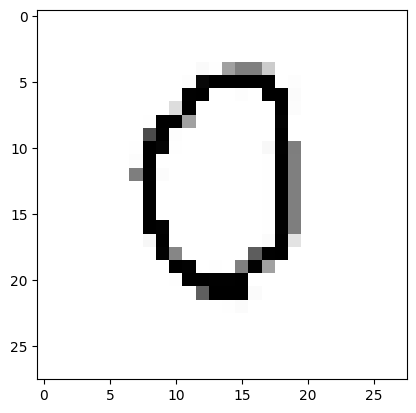

1/1 [==============================] - 0s 21ms/step
взяли : 1
Название класса: class_6
уверенность : 0.7092546820640564


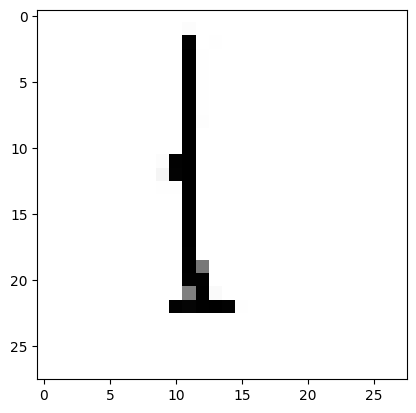

1/1 [==============================] - 0s 21ms/step
взяли : 2
Название класса: class_2
уверенность : 0.9999872446060181


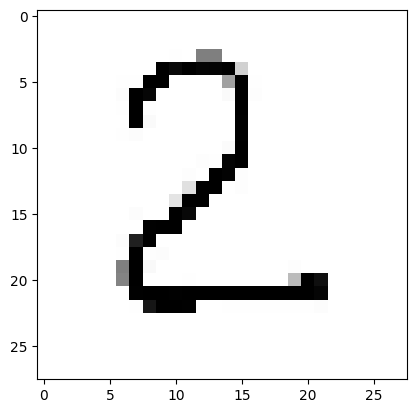

1/1 [==============================] - 0s 20ms/step
взяли : 3
Название класса: class_3
уверенность : 0.9999997615814209


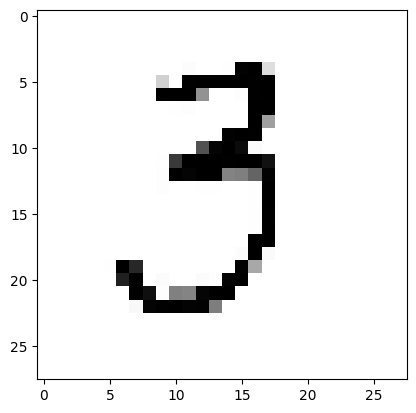

1/1 [==============================] - 0s 21ms/step
взяли : 4
Название класса: class_4
уверенность : 0.9999440908432007


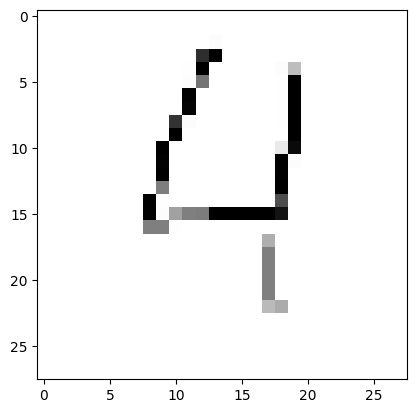

1/1 [==============================] - 0s 21ms/step
взяли : 5
Название класса: class_5
уверенность : 0.9781306385993958


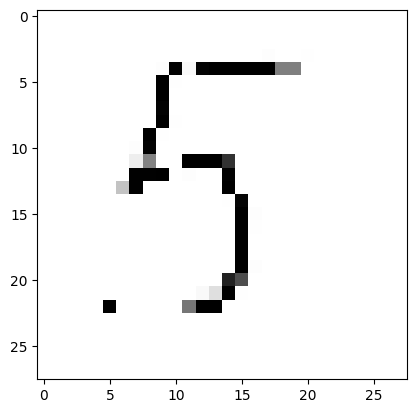

1/1 [==============================] - 0s 21ms/step
взяли : 6
Название класса: class_6
уверенность : 0.6039052605628967


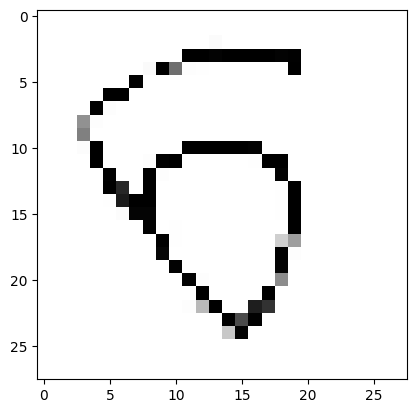

1/1 [==============================] - 0s 20ms/step
взяли : 7
Название класса: class_2
уверенность : 0.997645914554596


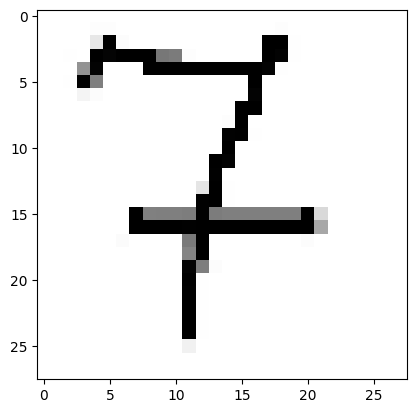

1/1 [==============================] - 0s 20ms/step
взяли : 8
Название класса: class_8
уверенность : 0.9804303050041199


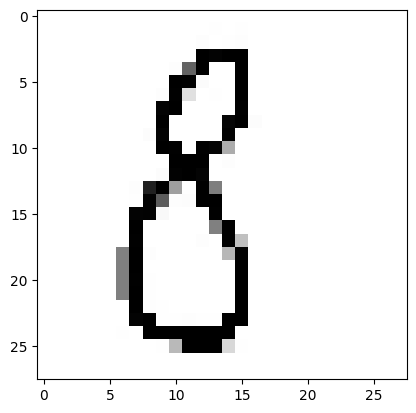

1/1 [==============================] - 0s 21ms/step
взяли : 9
Название класса: class_9
уверенность : 0.9961525797843933


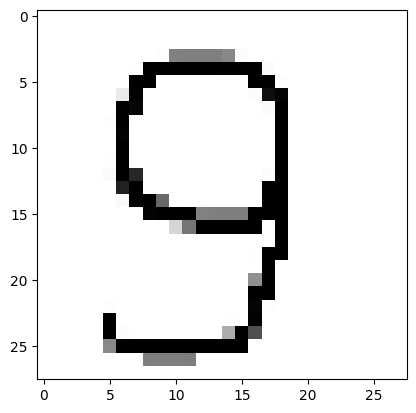

In [11]:
for i in range(10):
    img = utils.load_img(f"img\\{i}.jpg", target_size=(28, 28), color_mode = "grayscale")
    prediction = model.predict(preobr(img))
    #print(prediction)
    pred = np.argmax(prediction)
    con = prediction[0][pred]
    print(f"взяли : {i}")
    print("Название класса:", classes[pred])
    print(f"уверенность : {con}")
    plt.imshow(img.convert('RGBA'))
    plt.show()

видим, что на многих цифрах плохие резьтаты, возможно из-за переобучения

In [12]:
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0329 - val_accuracy: 0.9902


313/313 [==============================] - 1s 4ms/step - loss: 0.0329 - accuracy: 0.9902
точность: 0.9901999831199646
1/1 [==============================] - 0s 20ms/step
7


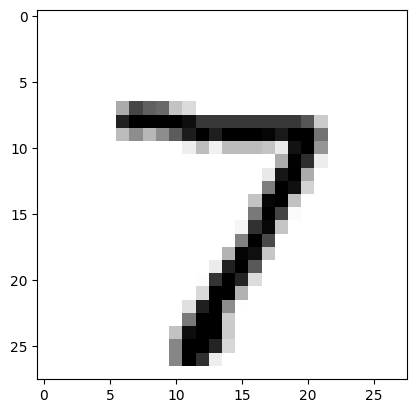

1/1 [==============================] - 0s 21ms/step
2


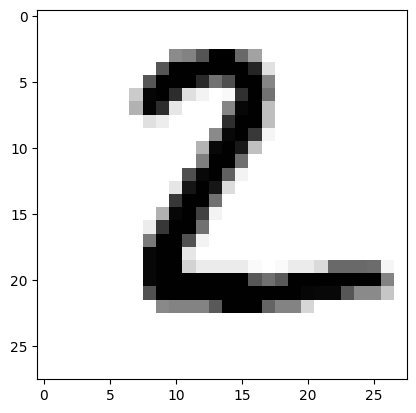

1/1 [==============================] - 0s 26ms/step
1


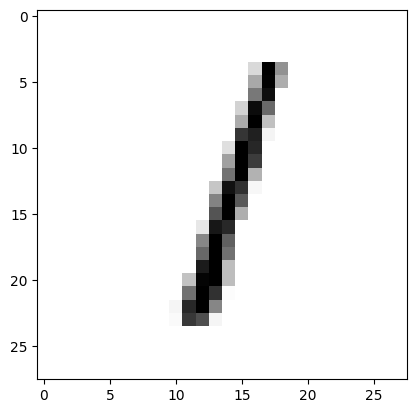

1/1 [==============================] - 0s 21ms/step
0


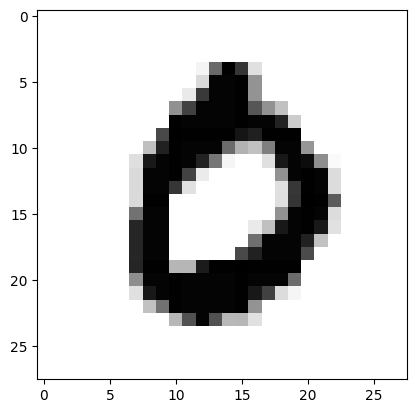

1/1 [==============================] - 0s 21ms/step
4


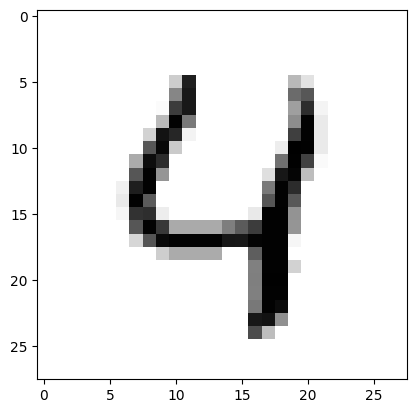

1/1 [==============================] - 0s 21ms/step
1


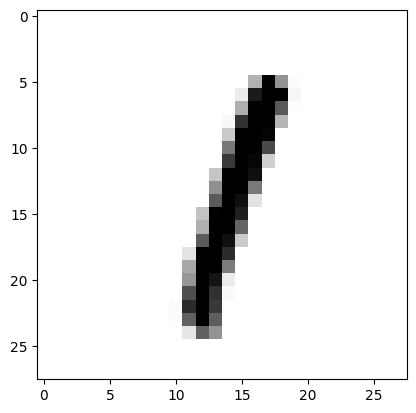

1/1 [==============================] - 0s 21ms/step
4


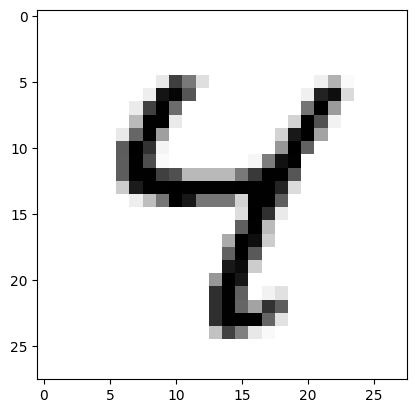

1/1 [==============================] - 0s 21ms/step
9


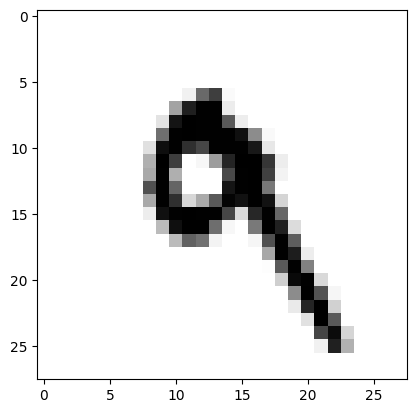

1/1 [==============================] - 0s 19ms/step
5


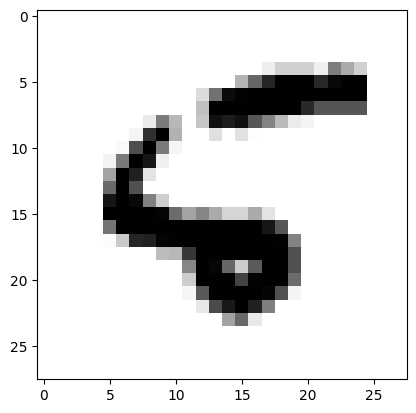

1/1 [==============================] - 0s 20ms/step
9


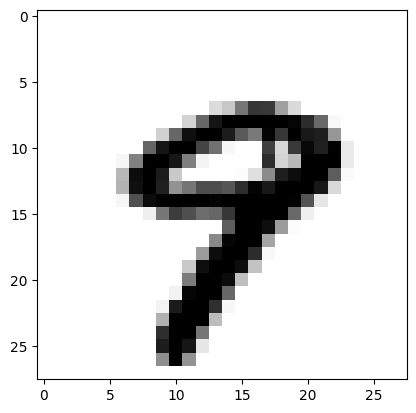

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('точность:', test_acc)
for n_test in range(10):
    x = np.expand_dims(x_test[n_test], axis=0)
    predict = model.predict(x)
    pre = np.argmax(predict)
    print(pre)
    plt.imshow(x_test[n_test].reshape(28, 28), cmap=plt.cm.binary)
    plt.show()

видно, что на обучающей выборке предсказания верные

1/1 [==============================] - 0s 21ms/step
взяли : 0
Название класса: class_0
уверенность : 0.9807189702987671


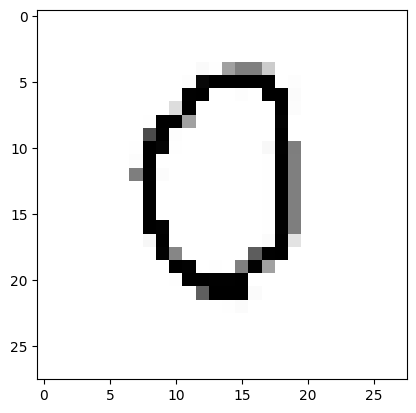

1/1 [==============================] - 0s 20ms/step
взяли : 1
Название класса: class_5
уверенность : 0.5064951777458191


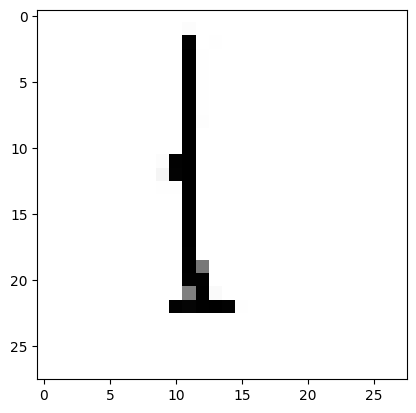

1/1 [==============================] - 0s 23ms/step
взяли : 2
Название класса: class_2
уверенность : 0.9999988079071045


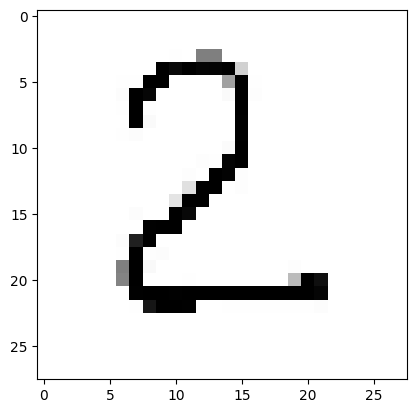

1/1 [==============================] - 0s 21ms/step
взяли : 3
Название класса: class_3
уверенность : 0.9999996423721313


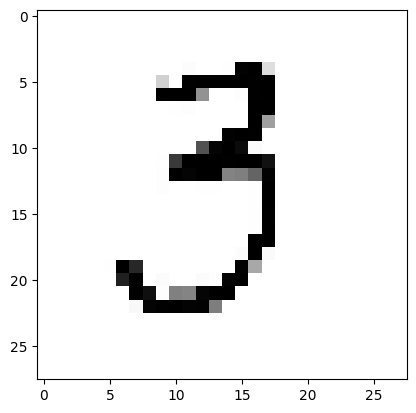

1/1 [==============================] - 0s 21ms/step
взяли : 4
Название класса: class_4
уверенность : 0.9999884366989136


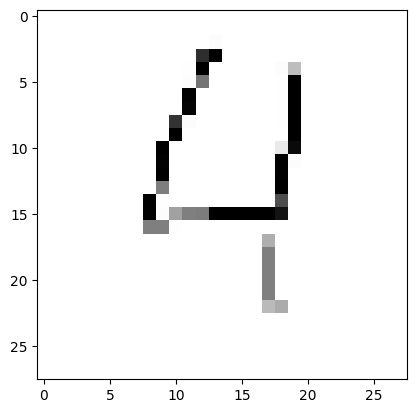

1/1 [==============================] - 0s 21ms/step
взяли : 5
Название класса: class_5
уверенность : 0.973937451839447


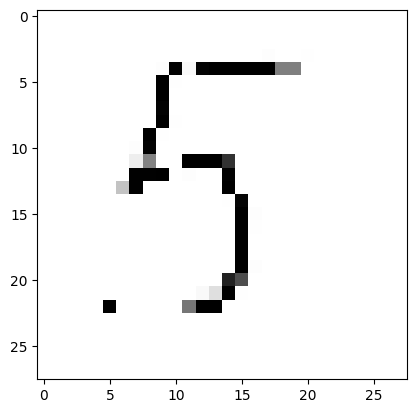

1/1 [==============================] - 0s 22ms/step
взяли : 6
Название класса: class_7
уверенность : 0.9686236381530762


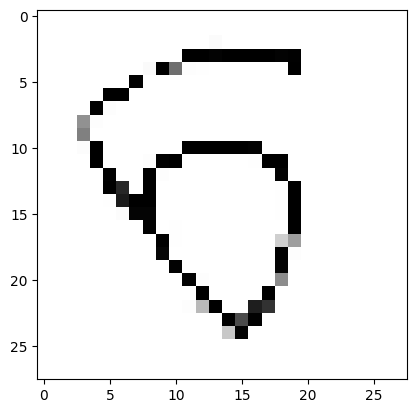

1/1 [==============================] - 0s 21ms/step
взяли : 7
Название класса: class_2
уверенность : 0.9280167818069458


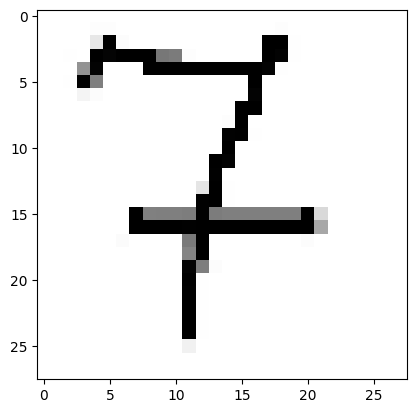

1/1 [==============================] - 0s 19ms/step
взяли : 8
Название класса: class_8
уверенность : 0.9993559718132019


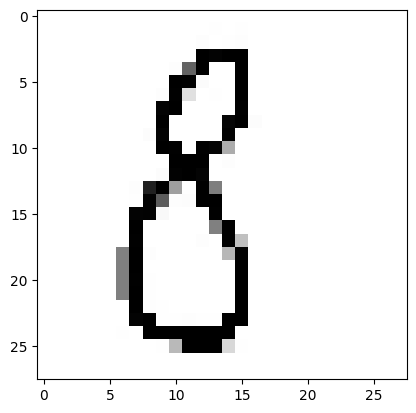

1/1 [==============================] - 0s 20ms/step
взяли : 9
Название класса: class_9
уверенность : 0.9994221925735474


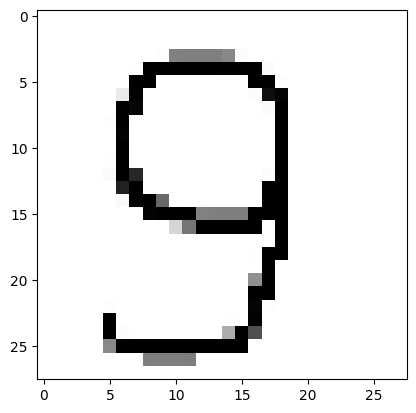

In [14]:
for i in range(10):
    img = utils.load_img(f"img\\{i}.jpg", target_size=(28, 28), color_mode = "grayscale")
    prediction = model.predict(preobr(img))
    #print(prediction)
    pred = np.argmax(prediction)
    con = prediction[0][pred]
    print(f"взяли : {i}")
    print("Название класса:", classes[pred])
    print(f"уверенность : {con}")
    plt.imshow(img.convert('RGBA'))
    plt.show()

и всёравно не особо хорошие результаты ((

Пробую пересоздать модель с использованием Dropout
это позволит в случайном порядке отключать 20% нейронов для избежания переобучения 

In [15]:
from keras.layers import Dropout, GlobalAveragePooling2D

In [16]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1809 - accuracy: 0.9447 - val_loss: 0.0523 - val_accuracy: 0.9829
Epoch 2/2
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0645 - accuracy: 0.9804 - val_loss: 0.0380 - val_accuracy: 0.9886


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('точность:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0380 - accuracy: 0.9886
точность: 0.9886000156402588


1/1 [==============================] - 0s 72ms/step
взяли : 0
Название класса: class_0
уверенность : 0.9986649751663208


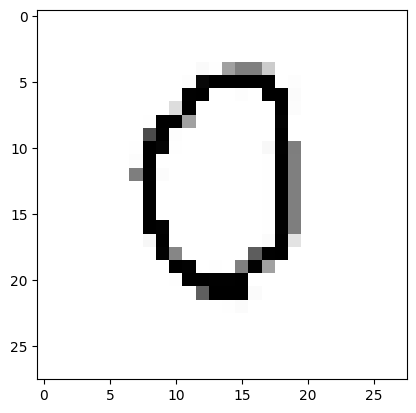

1/1 [==============================] - 0s 21ms/step
взяли : 1
Название класса: class_0
уверенность : 0.5760168433189392


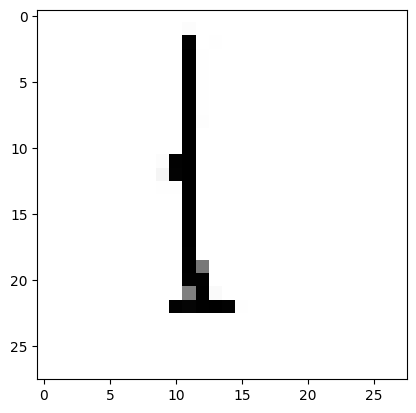

1/1 [==============================] - 0s 21ms/step
взяли : 2
Название класса: class_2
уверенность : 0.9999783039093018


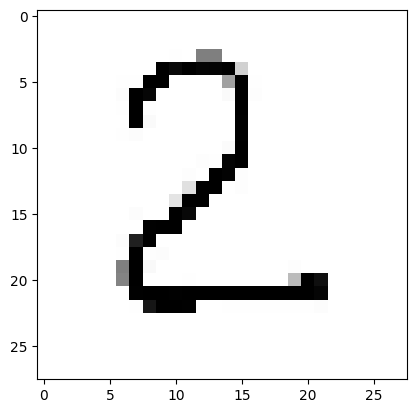

1/1 [==============================] - 0s 22ms/step
взяли : 3
Название класса: class_3
уверенность : 0.999993085861206


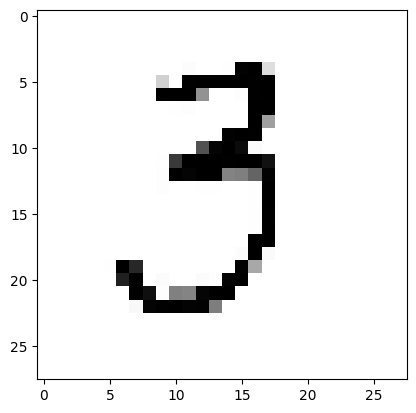

1/1 [==============================] - 0s 21ms/step
взяли : 4
Название класса: class_4
уверенность : 0.9973223805427551


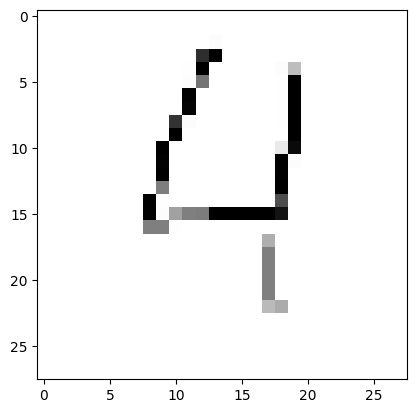

1/1 [==============================] - 0s 20ms/step
взяли : 5
Название класса: class_5
уверенность : 0.9631743431091309


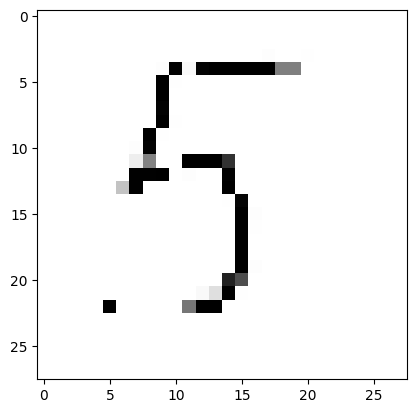

1/1 [==============================] - 0s 21ms/step
взяли : 6
Название класса: class_5
уверенность : 0.8057603240013123


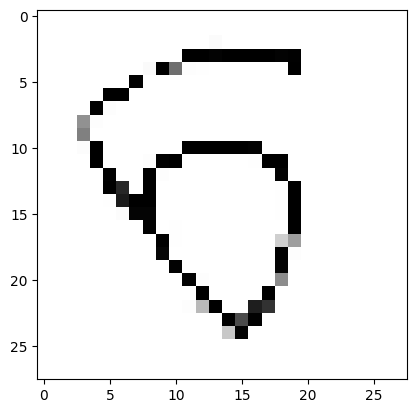

1/1 [==============================] - 0s 21ms/step
взяли : 7
Название класса: class_2
уверенность : 0.5657316446304321


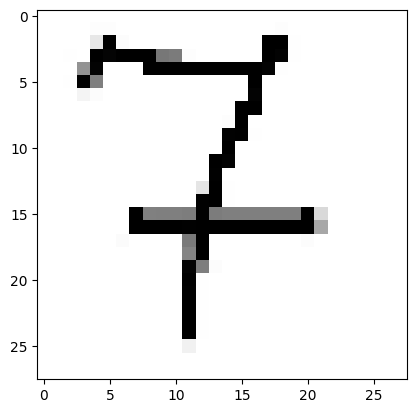

1/1 [==============================] - 0s 21ms/step
взяли : 8
Название класса: class_8
уверенность : 0.961851179599762


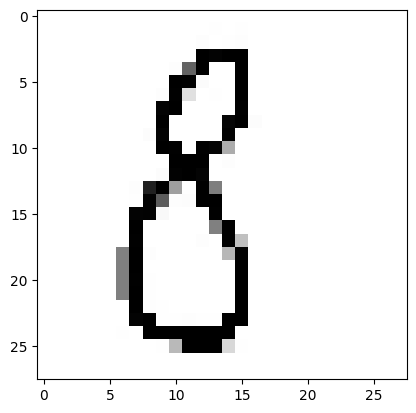

1/1 [==============================] - 0s 21ms/step
взяли : 9
Название класса: class_9
уверенность : 0.9039778709411621


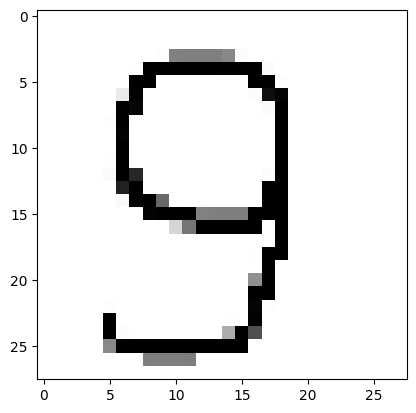

In [20]:
for i in range(10):
    img = utils.load_img(f"img\\{i}.jpg", target_size=(28, 28), color_mode = "grayscale")
    prediction = model.predict(preobr(img))
    #print(prediction)
    pred = np.argmax(prediction)
    con = prediction[0][pred]
    print(f"взяли : {i}")
    print("Название класса:", classes[pred])
    print(f"уверенность : {con}")
    plt.imshow(img.convert('RGBA'))
    plt.show()

всё стало только хуже(((

попробовал взять первую модель и прогнать по ней те же рисунки, только с более жирными линиями

In [21]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),#первый слой
    #сделали изображение ЧБ
    #relu - функция активации
    #у слоя 32 фильтра, у такого же следующего 64
    #размеры фильров 3 на 3
    MaxPooling2D((2,2)),#слой обьеденения макс значения
    Conv2D(64, (3,3), activation='relu'),#ещё свёрточный слой
    MaxPooling2D((2,2)),#ещё обьеденение
    Flatten(),#преобразование в вектор
    Dense(64, activation='relu'),#слой с 64 нейронами
    Dense(10, activation='softmax')#выходной слой с 10 нейронами
])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

1875/1875 [==============================] - 21s 11ms/step - loss: 0.1437 - accuracy: 0.9545 - val_loss: 0.0535 - val_accuracy: 0.9814


1/1 [==============================] - 0s 69ms/step
взяли : 0
Название класса: class_0
уверенность : 0.9982662796974182


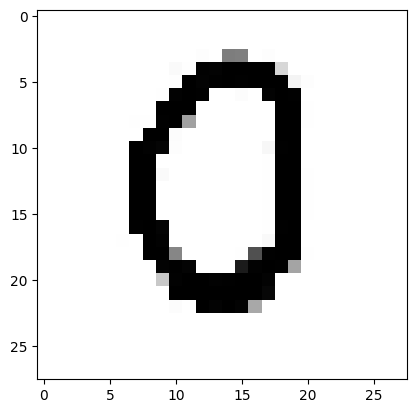

1/1 [==============================] - 0s 24ms/step
взяли : 1
Название класса: class_1
уверенность : 0.9371562004089355


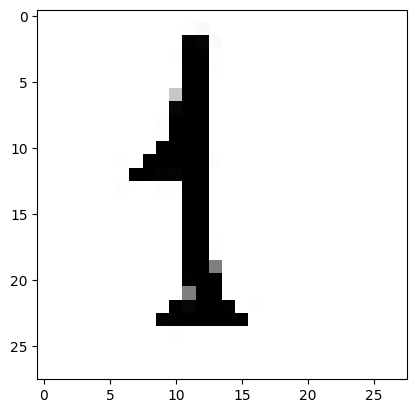

1/1 [==============================] - 0s 20ms/step
взяли : 2
Название класса: class_2
уверенность : 0.9996497631072998


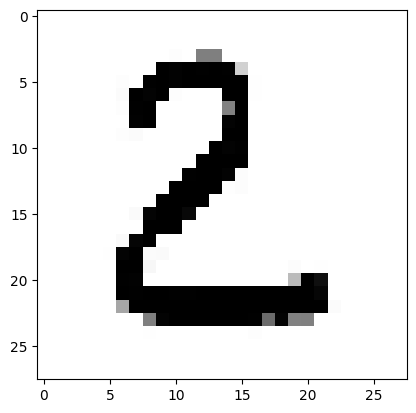

1/1 [==============================] - 0s 22ms/step
взяли : 3
Название класса: class_3
уверенность : 0.9998650550842285


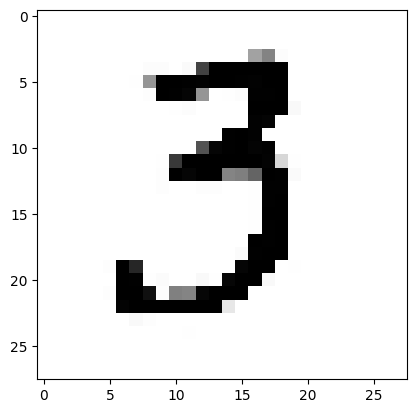

1/1 [==============================] - 0s 20ms/step
взяли : 4
Название класса: class_4
уверенность : 0.9999977350234985


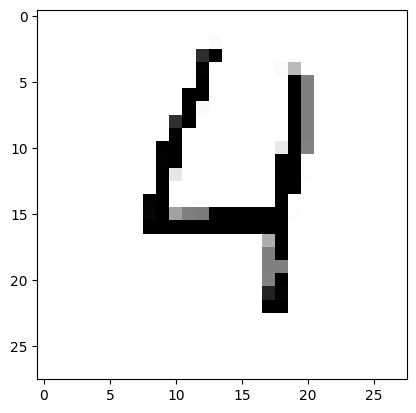

1/1 [==============================] - 0s 21ms/step
взяли : 5
Название класса: class_5
уверенность : 0.998314380645752


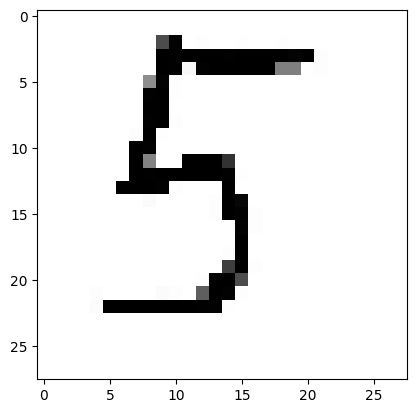

1/1 [==============================] - 0s 20ms/step
взяли : 6
Название класса: class_5
уверенность : 0.9172391891479492


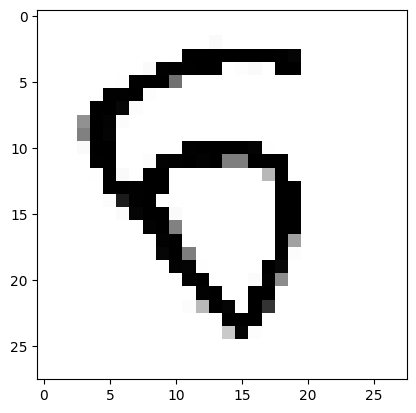

1/1 [==============================] - 0s 20ms/step
взяли : 7
Название класса: class_2
уверенность : 0.9804465174674988


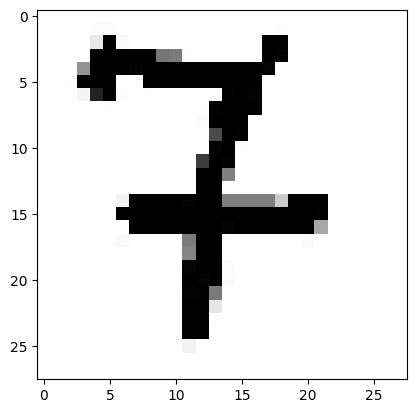

1/1 [==============================] - 0s 21ms/step
взяли : 8
Название класса: class_8
уверенность : 0.5282317996025085


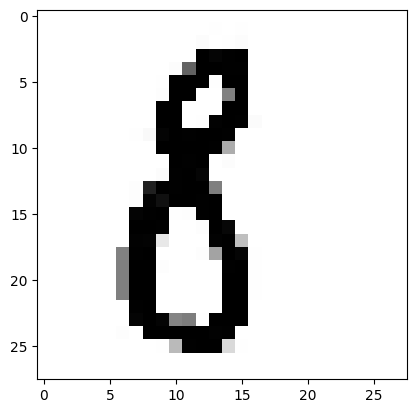

1/1 [==============================] - 0s 22ms/step
взяли : 9
Название класса: class_3
уверенность : 0.6329538226127625


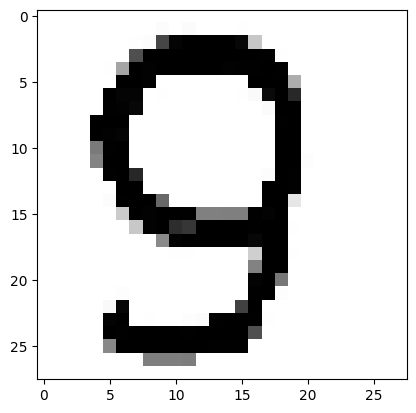

In [24]:
for i in range(10):
    img = utils.load_img(f"my_img\\{i}.jpg", target_size=(28, 28), color_mode = "grayscale")
    prediction = model.predict(preobr(img))
    #print(prediction)
    pred = np.argmax(prediction)
    con = prediction[0][pred]
    print(f"взяли : {i}")
    print("Название класса:", classes[pred])
    print(f"уверенность : {con}")
    plt.imshow(img.convert('RGBA'))
    plt.show()

значения очень странные
на тестовой выборке модель может найти правильные цифры даже по более плохимь рисункам, здесь же с чёткими линиями всегда может распознать только 0 и 9
не понятно с чем это связано